In [4]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm, SymLogNorm
import sys
from scipy.integrate import simps, quadrature
from scipy.interpolate import interp1d
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import RectBivariateSpline as rbspline
from time import time
import json

sys.path.append('../scripts/')
from lab import *
import tools


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
using z-bin None norm 65.75020607931236
using z-bin [0, 0.5, 0.03] norm 14.32276056640902
using z-bin [0.5, 0.5, 0.03] norm 23.943209238913052
using z-bin [1.0, 1.0, 0.04] norm 21.63232752061847
using z-bin [2.0, 1.0, 0.05] norm 3.7179104375669816
using z-bin [3.0, 1.0, 0.05] norm 1.471852539963635


In [5]:
dpath = '../PostBornEma/'
spath = '../scripts/'
chis = np.loadtxt('../output/chis.txt')

# ell_, t_, nu_n_, I0_ltrc, I2_ltrc, I4_ltrc = tools.loadfftlogdata()
# t1, w1 = tools.loadggwts()
# ell_h, t_h, nu_n_h, I0_ltrc_h, I2_ltrc_h, I4_ltrc_h = tools.loadfftlogdata_highell()
# t1_h, w1_h = tools.loadggwts_highell()
# assert(np.allclose(t_,t1))

# #Setup cosmology dicts                                                                                                                                                                                                                                                                    
# with open(spath + 'class_cosmo_b.json', 'r') as fp: cosmo_b = json.load(fp)
# for key in cosmo_b: cosmo_b[key] = np.array(cosmo_b[key])
# with open(spath + 'cosmo_dict.json', 'r') as fp: cosmo_dict = json.load(fp)
# for key in cosmo_dict: locals()[key] = cosmo_dict[key]



# #prefactor for Cl_kk computation from Cl_dd                                                                                                                                                                                                                                               
# c      = 299792458./1000. # km/s                                                                                                                                                                                                                                                          
# Omega_b   = omega_b/h**2
# Omega_cdm = omega_cdm/h**2
# Omega_m   = Omega_b+Omega_cdm
# prefac = 1.5*Omega_m*(100.)**2/c**2 #without h                                                                                                                                                                                                                                            


# #Setup interpolating functions                                                                                                                                                                                                                                                            
# class_z               = cosmo_b['z'][::-1]
# class_chi             = cosmo_b['comov. dist.'][::-1]
# class_D               = cosmo_b['gr.fac. D'][::-1]
# class_H               = cosmo_b['H [1/Mpc]'][::-1]/h #already divided by c                                                                                                                                                                                                                

# chi_z = interp1d(class_z,class_chi*h,fill_value=0, bounds_error=False)
# z_chi = interp1d(class_chi*h,class_z,fill_value=0, bounds_error=False)  # Mpc/h                                                                                                                                                                                                           
# D_chi = interp1d(class_chi*h,class_D,fill_value=0, bounds_error=False)    # growth                                                                                                                                                                                                        
# D_z   = interp1d(class_z,class_D,fill_value=0, bounds_error=False)

# #                                                                                                                                                                                                                                                                                         
# chi_cmb = chi_z(z_cmb)
# dchi_dz=(class_chi[1::]-class_chi[0:-1])/(class_z[1::]-class_z[0:-1])*h
# z_mean = (class_z[1::]+class_z[0:-1])/2
# dz_dchi = interp1d(class_chi*h,class_H,fill_value=0, bounds_error=False)
# dchi_dz = interp1d(z_mean,dchi_dz,fill_value=0, bounds_error=False)



# Compare M matrices with VB

In [11]:
vbpath = '../M_matrices/'
cmpath = '../output/cm_clmesh/lsst-all_simple/'



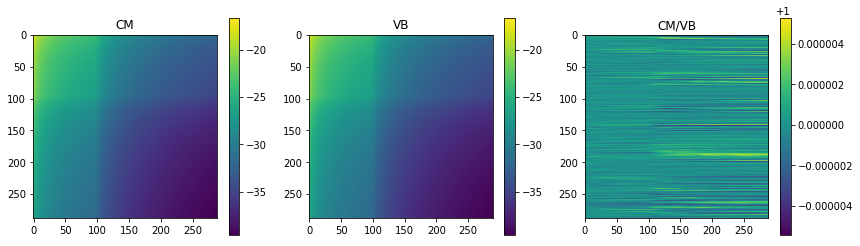

array([[0.99999982, 0.99999986, 0.99999988, ..., 1.00000013, 1.00000013,
        1.00000012],
       [0.99999993, 0.99999996, 1.        , ..., 0.99999981, 0.99999981,
        0.99999981],
       [1.00000029, 1.00000021, 1.00000013, ..., 0.99999993, 0.99999993,
        0.99999993],
       ...,
       [0.99999993, 1.        , 1.00000006, ..., 0.99999972, 0.99999973,
        0.99999974],
       [1.0000001 , 1.00000006, 1.00000004, ..., 0.99999903, 0.99999902,
        0.99999902],
       [1.0000001 , 1.00000007, 1.00000004, ..., 1.00000054, 1.00000053,
        1.00000053]])

In [149]:
# #cl22B ##Agree after transpose
# vb = np.load('../M_matrices/M22B_lsstall_cmblens.npy', encoding='latin1')[1]
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl22B.npy').T

# #cl22A #Agree
# vb = np.load('../M_matrices/M22A_lsstall_cmblens.npy', encoding='latin1')[1]
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl22A.npy')

# #cl13a #Agree
# vb = np.load('../M_matrices/M13a_lsstall_cmblens.npy', encoding='latin1')[1]
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl13a.npy')

# #cl13b #Agree
# vb = np.load('../M_matrices/M13b_lsstall_cmblens.npy', encoding='latin1')[1]
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl13b.npy')

# ##cl13j #Agree
# vb = np.load('../M_matrices/M13J_lsstall_cmblens.npy', encoding='latin1')[1]*-1
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl13j.npy')

# #cl31aA #Agree
# vb = np.load('../M_matrices/M31aA_lsstall_cmblens.npy', encoding='latin1')[1]
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl31aA.npy')

# #cl31aB #Agree
# vb = np.load('../M_matrices/M31aB_lsstall_cmblens.npy', encoding='latin1')[1]
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl31aB.npy')

# # cl31b #Agree
# vb = np.load('../M_matrices/M31b_lsstall_cmblens.npy', encoding='latin1')[1]*-1
# cm = np.load('../output/cm_clmesh/lsst-all_simple/cl31b.npy') *-1


plt.figure(figsize = (14, 4))
ax = plt.subplot(1, 3, 1)
plt.imshow(np.log10(cm))
plt.colorbar()
plt.title('CM')
ax = plt.subplot(1, 3, 2)
plt.imshow(np.log10(vb))
plt.colorbar()
plt.title('VB')
ax = plt.subplot(1, 3, 3)
plt.imshow((cm/vb))
# plt.imshow(np.log10(cm/vb))
plt.colorbar()
plt.title('CM/VB')
plt.show()


cm/vb

# Ell integrals

In [171]:
from scipy.integrate import simps
from scipy.interpolate import RectBivariateSpline as rbs

## cl13j

Text(0.5, 1.0, 'Cl13J')

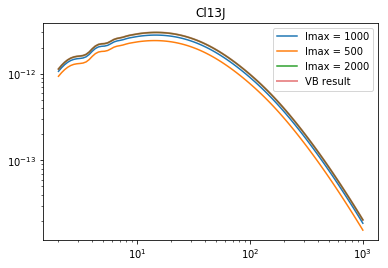

In [204]:
# cl13j 
cmapth = '../output/cm_clmesh/lsst-all_simple/'
result = np.load('/global/u1/c/chmodi/Programs/postlimber/output/results/term5_lsstall_cmblens.npy')
pi = np.pi
mesh = np.load(cmpath + '/cl13j.npy')
imesh = rbs(ell_, ell_, mesh)
fac = 1/(2*pi)**2 * (2*pi)
L = np.logspace(np.log10(2), 3, 100)


def lintegral(imesh, L, l):
    cl = np.zeros_like(L)
    for iL, LL in enumerate(L): cl[iL] = fac * simps(imesh(LL, l)*l**3*LL**4, l)
    return cl

l = np.logspace(np.log10(min(ell_)),np.log10(1000),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, label='lmax = 1000')

l = np.logspace(np.log10(min(ell_)),np.log10(500),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, label='lmax = 500')

l = np.logspace(np.log10(min(ell_)),np.log10(2000),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, label='lmax = 2000')

plt.plot(*result, lw = 2, alpha = 0.5, label='VB result')
plt.loglog()
plt.legend()
plt.title('Cl13J')


## cl13b

Text(0.5, 1.0, 'Cl13b')

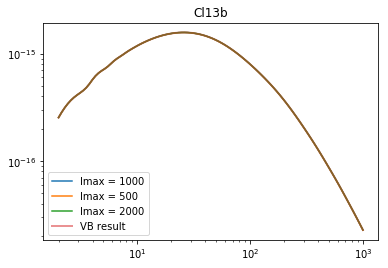

In [205]:
# cl13j 
cmapth = '../output/cm_clmesh/lsst-all_simple/'
result = np.load('/global/u1/c/chmodi/Programs/postlimber/output/results/term4_lsstall_cmblens.npy')
pi = np.pi
mesh = np.load(cmpath + '/cl13b.npy')
imesh = rbs(ell_, ell_, mesh)
fac = 1/(2*pi)**2 * (pi)
L = np.logspace(np.log10(2), 3, 100)

def lintegral(imesh, L, l):
    cl = np.zeros_like(L)
    for iL, LL in enumerate(L): cl[iL] = fac * simps(imesh(LL, l)*l**3*LL**4, l)
    return cl

l = np.logspace(np.log10(min(ell_)),np.log10(1000),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, label='lmax = 1000')

l = np.logspace(np.log10(min(ell_)),np.log10(500),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, label='lmax = 500')

l = np.logspace(np.log10(min(ell_)),np.log10(2000),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, label='lmax = 2000')

plt.plot(*result, lw = 2, alpha = 0.5, label='VB result')
plt.loglog()
plt.legend()
plt.title('Cl13b')


## cl31b

Text(0.5, 1.0, 'Cl31b')

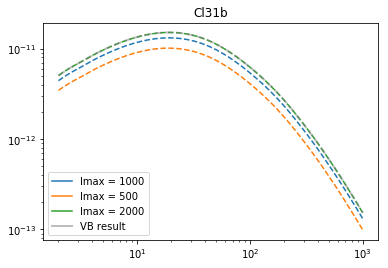

In [212]:

cmapth = '../output/cm_clmesh/lsst-all_simple/'
result = np.load('/global/u1/c/chmodi/Programs/postlimber/output/results/term3_lsstall_cmblens.npy')
pi = np.pi
mesh = np.load(cmpath + '/cl31b.npy')
imesh = rbs(ell_, ell_, mesh)
fac = 1/(2*pi)**2 * (pi)
L = np.logspace(np.log10(2), 3, 100)

def lintegral(imesh, L, l):
    cl = np.zeros_like(L)
    for iL, LL in enumerate(L): cl[iL] = fac * simps(imesh(LL, l)*l**5*LL**2, l)
    return cl

l = np.logspace(np.log10(min(ell_)),np.log10(1000),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, 'C0', label='lmax = 1000')
plt.plot(L, -cl, 'C0--')

l = np.logspace(np.log10(min(ell_)),np.log10(500),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, 'C1', label='lmax = 500')
plt.plot(L, -cl, 'C1--')

l = np.logspace(np.log10(min(ell_)),np.log10(2000),1000)
cl = lintegral(imesh, L, l)
plt.plot(L, cl, 'C2', label='lmax = 2000')
plt.plot(L, -cl, 'C2--')

plt.plot(*result, 'C7', lw = 2, alpha = 0.5, label='VB result')
plt.plot(result[0], -result[1], 'C7--', lw = 2, alpha = 0.5)
plt.loglog()
plt.legend()
plt.title('Cl31b')


# Cl22 + Cl13

In [387]:
pi = np.pi
trapz = np.trapz

def Mdiffintegral(imesh22, imesh13, L, l):
    theta = np.linspace(0, 2*pi, 1000, endpoint=True)
    nu = np.cos(theta)
    nu2d = nu.reshape(1, -1)
    l2d = l.reshape(-1, 1)
    fac = 1/(2*pi)**2
    cl = np.zeros_like(L)
    
    for iL, LL in enumerate(L):
        Lfac = (LL**2 + LL*l2d*nu2d)
        Lfac *= (LL*l2d*nu2d + l2d**2)**2
        Lfac *= l2d

        M13 = imesh13(LL, l).reshape(-1, 1)
        M22 = np.zeros((l.size, nu.size))

        for il, ll in enumerate(l):
            L2 = np.sqrt(LL**2 + ll**2 + 2*LL*ll*nu)
#             M22[il] = imesh22(ll, L2, grid=False)
            M22[il] = imesh22(L2, ll, grid=False)
        
        integrand = Lfac*(M22 - M13)
        integrand = simps(integrand, theta, axis=1)
        cl[iL] = simps(integrand, l, axis=0)

    return cl*fac


def Ldiffintegral(imesh13, L, l):
    theta = np.linspace(0, 2*pi, 1000, endpoint=True)
    nu = np.cos(theta)
    nu2d = nu.reshape(1, -1)
    l2d = l.reshape(-1, 1)
    fac = 1/(2*pi)**2
    cl = np.zeros_like(L)

    for iL, LL in enumerate(L):
        Lfac = (LL**2 + LL*l2d*nu2d)
        Lfac *= (LL*l2d*nu2d + l2d**2)**2
        Lfac *= l2d
        L31fac = LL**2 * (LL*l2d*nu2d)**2
        L31fac *= l2d

        Lfac = Lfac - L31fac

        M13 = imesh13(LL, l).reshape(-1, 1)
        integrand = Lfac*M13
        if iL ==0: print(integrand.shape)
        integrand = simps(integrand, theta, axis=1)
        cl[iL] = simps(integrand, l, axis=0)

    return cl*fac

# def lintegral31(imesh13, L, l):
#     theta = np.linspace(0, 2*pi, 1000, endpoint=True)
#     nu = np.cos(theta)
#     nu2d = nu.reshape(1, -1)
#     l2d = l.reshape(-1, 1)
#     fac = 1/(2*pi)**2
#     cl = np.zeros_like(L)

#     for iL, LL in enumerate(L):
#         L31fac = LL**2 * (LL*l2d*nu2d)**2
#         Lfac = l2d*(L31fac )

#         M13 = imesh13(LL, l).reshape(-1, 1)
#         integrand = Lfac*M13
#         if iL ==0: print(integrand.shape)
#         integrand = simps(integrand, theta, axis=1)
#         cl[iL] = simps(integrand, l, axis=0)

#     return cl*fac


##############

cmapth = '../output/cm_clmesh/lsst-all_simple/'
pi = np.pi
mesh22 = np.load(cmpath + '/cl22A.npy') 
imesh22 = rbs(ell_, ell_, mesh22)
mesh13 = np.load(cmpath + '/cl31aA.npy') + np.load(cmpath + '/cl13a.npy')
imesh13 = rbs(ell_, ell_, mesh13)

L = np.logspace(np.log10(2), 3, 100)
l = np.logspace(np.log10(2), np.log10(max(ell_)), 1000)

cl1 = Mdiffintegral(imesh22, imesh13, L, l)
cl2 = Ldiffintegral(imesh13, L, l)
cl31 = lintegral31(imesh13, L, l)


(1000, 1000)
(1000, 1000)


Text(0.5, 1.0, 'Cl22 + Cl13 Limber Term')

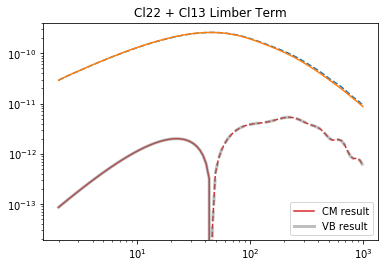

In [390]:
result = np.load('/global/u1/c/chmodi/Programs/postlimber/output/results/term1_lsstall_cmblens.npy')

plt.plot(L, cl1, 'C0')
plt.plot(L, -cl1, 'C0--')
plt.plot(L, cl2, 'C1')
plt.plot(L, -cl2, 'C1--')
plt.plot(L, cl1+cl2, 'C3', label='CM result')
plt.plot(L, -(cl1+cl2), 'C3--')
plt.plot(result[0], result[1], 'C7-', lw = 3, alpha = 0.5, label='VB result')
plt.plot(result[0], -result[1], 'C7--', lw = 3, alpha = 0.5)
plt.loglog()
plt.legend()
plt.title('Cl22 + Cl13 Limber Term')

In [391]:
# def get_regularized_sum_of_terms(L,L1,phi,M1,M2,method='trapz'):
#     nu = np.cos(phi)
#     res=[]
#     for LL in L:
#         resL1=[]
#         for LL1 in L1:
#             L_= LL*np.sqrt(1.+(LL1/LL)**2+2.*LL1/LL*nu)
#             integrand = LL1*(LL**2+LL*LL1*nu)*(LL1**2+LL*LL1*nu)**2*(M1(L_,LL1,grid=False)-M2(LL,LL1,grid=False))
#             if method =='simps':
#                 resL1+=[simps(integrand,phi)]
#             elif method =='trapz':
#                 resL1+=[np.trapz(integrand,phi)]
#             elif method =='sum':
#                 resL1+=[np.sum(integrand*np.diff(phi)[0])]
#         res+=[simps(resL1,L1)]
#     res=np.asarray(res)/(2.*np.pi)**2
#     return res


# #numerical angular integration
# def get_second_sum_of_terms(L,L1,M,method='trapz'):
#     nu = np.cos(phi)
#     res=[]
#     for LL in L:
#         resL1=[]
#         for LL1 in L1:
#             integrand =  LL1*((LL**2+LL*LL1*nu)*(LL1**2+LL*LL1*nu)**2-LL**2*(LL*LL1*nu)**2)*(M(LL,LL1,grid=False))
#             if method =='simps':
#                 resL1+=[simps(integrand,phi)]
#             elif method =='trapz':
#                 resL1+=[np.trapz(integrand,phi)]
#             elif method =='sum':
#                 resL1+=[np.sum(integrand*np.diff(phi)[0])]
#         res+=[simps(resL1,L1)]
#     res=np.asarray(res)/(2.*np.pi)**2
#     return res


# phi = np.linspace(0.,2.*np.pi,1000,endpoint=True)
# mesh22 = np.load(cmpath + '/cl22A.npy') 
# imesh22 = rbs(ell_, ell_, mesh22)
# mesh13 = np.load(cmpath + '/cl31aA.npy') + np.load(cmpath + '/cl13a.npy')
# imesh13 = rbs(ell_, ell_, mesh13)
# MA_spline       = imesh22
# tildeMA_spline  = imesh13

# # begin = time.time()
# all_bins1 = get_regularized_sum_of_terms(L,l,phi,MA_spline,tildeMA_spline,method='trapz')
# all_bins2 = get_second_sum_of_terms(L,l,tildeMA_spline,method='trapz')
# # print(time.time()-begin)

# plt.plot(L, all_bins1, 'C0')
# plt.plot(L, -all_bins1, 'C0--')
# plt.plot(L, all_bins2, 'C1')
# plt.plot(L, -all_bins2, 'C1--')
# plt.plot(L, all_bins1+all_bins2, 'C3-')
# plt.plot(L, -(all_bins1+all_bins2), 'C3--')

# plt.loglog()

# Cl22 + Cl13 post

In [392]:
pi = np.pi
trapz = np.trapz

def Mdiffintegral(imesh22, imesh13, L, l):
    theta = np.linspace(0, 2*pi, 1000, endpoint=True)
    nu = np.cos(theta)
    nu2d = nu.reshape(1, -1)
    l2d = l.reshape(-1, 1)
    fac = 1/(2*pi)**2
    cl = np.zeros_like(L)
    
    for iL, LL in enumerate(L):
        Lfac = LL*l2d*nu
        Lfac *= (LL*l2d*nu2d - l2d**2)**2
        Lfac *= l2d

        M13 = imesh13(LL, l).reshape(-1, 1)
        M22 = np.zeros((l.size, nu.size))

        for il, ll in enumerate(l):
            L2 = np.sqrt(LL**2 + ll**2 - 2*LL*ll*nu)
            M22[il] = imesh22(ll, L2, grid=False)
        
        integrand = Lfac*(M22 - M13)
        integrand = trapz(integrand, theta, axis=1)
        cl[iL] = trapz(integrand, l, axis=0)

    return cl*fac


def Ldiffintegral(imesh13, L, l):
    theta = np.linspace(0, 2*pi, 1000, endpoint=True)
    nu = np.cos(theta)
    nu2d = nu.reshape(1, -1)
    l2d = l.reshape(-1, 1)
    fac = 1/(2*pi)**2
    cl = np.zeros_like(L)

    for iL, LL in enumerate(L):
        Lfac = LL*l2d*nu
        Lfac *= (LL*l2d*nu2d - l2d**2)**2
        Lfac *= l2d
        L31fac = l2d**2 * (LL*l2d*nu2d)**2
        L31fac *= l2d

        Lfac = Lfac - L31fac

        M13 = imesh13(LL, l).reshape(-1, 1)
        integrand = Lfac*M13
        if iL ==0: print(integrand.shape)
        integrand = trapz(integrand, theta, axis=1)
        cl[iL] = trapz(integrand, l, axis=0)

    return cl*fac


##############

cmapth = '../output/cm_clmesh/lsst-all_simple/'
result = np.load('/global/u1/c/chmodi/Programs/postlimber/output/results/term2_lsstall_cmblens.npy')
pi = np.pi
mesh22 = np.load(cmpath + '/cl22B.npy') 
imesh22 = rbs(ell_, ell_, mesh22)
mesh13 = np.load(cmpath + '/cl31aB.npy')
imesh13 = rbs(ell_, ell_, mesh13)

L = np.logspace(np.log10(2), 3, 100)
l = np.logspace(np.log10(2), np.log10(max(ell_)), 1000)

cl1 = Mdiffintegral(imesh22, imesh13, L, l)
cl2 = Ldiffintegral(imesh13, L, l)



(1000, 1000)


Text(0.5, 1.0, 'Cl22 + Cl13 Non Limber Term')

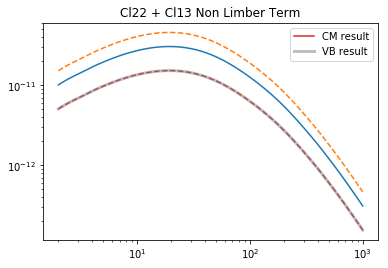

In [393]:
result = np.load('/global/u1/c/chmodi/Programs/postlimber/output/results/term2_lsstall_cmblens.npy')

plt.plot(L, cl1, 'C0')
plt.plot(L, -cl1, 'C0--')
plt.plot(L, cl2, 'C1')
plt.plot(L, -cl2, 'C1--')
plt.plot(L, cl1+cl2, 'C3', label='CM result')
plt.plot(L, -(cl1+cl2), 'C3--')
plt.plot(result[0], result[1], 'C7-', lw = 3, alpha = 0.5, label='VB result')
plt.plot(result[0], -result[1], 'C7--', lw = 3, alpha = 0.5)
plt.loglog()
plt.legend()
plt.title('Cl22 + Cl13 Non Limber Term')